In [1]:
# Adding src/ folder to import path
import sys

sys.path.append("../src")

In [40]:
import os.path

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import swifter
from birdclef.load_data import *

DATA_PATH = "/workspace/Data/birdclef-2021"
SAMPLE_RATE = 32000
NORM_ENERGY = 100
N_MEL = 200

In [67]:
%%sh
ls / workspace / Data / birdclef - 2021 / train_soundscapes

10534_SSW_20170429.ogg
11254_COR_20190904.ogg
14473_SSW_20170701.ogg
18003_COR_20190904.ogg
20152_SSW_20170805.ogg
21767_COR_20190904.ogg
26709_SSW_20170701.ogg
26746_COR_20191004.ogg
2782_SSW_20170701.ogg
28933_SSW_20170408.ogg
31928_COR_20191004.ogg
42907_SSW_20170708.ogg
44957_COR_20190923.ogg
50878_COR_20191004.ogg
51010_SSW_20170513.ogg
54955_SSW_20170617.ogg
57610_COR_20190904.ogg
7019_COR_20190904.ogg
7843_SSW_20170325.ogg
7954_COR_20190923.ogg


In [4]:
metadata_df = load_metadata(DATA_PATH)
labels_df = load_labels(DATA_PATH)

In [29]:
metadata_df

,primary_label,latitude,longitude,date,time,rating,filename,common_name,scientific_name,year,month,day
0,acafly,35.3860,-84.1250,2012-08-12,09:30,2.5,XC109605.ogg,Acadian Flycatcher,Empidonax virescens,2012,08,12
1,acafly,9.1334,-79.6501,2000-12-26,?,3.0,XC11209.ogg,Acadian Flycatcher,Empidonax virescens,2000,12,26
2,acafly,5.7813,-75.7452,2012-01-10,15:20,3.0,XC127032.ogg,Acadian Flycatcher,Empidonax virescens,2012,01,10
3,acafly,4.6717,-75.6283,2009-06-19,07:50,3.5,XC129974.ogg,Acadian Flycatcher,Empidonax virescens,2009,06,19
4,acafly,4.6717,-75.6283,2009-06-19,07:50,3.5,XC129981.ogg,Acadian Flycatcher,Empidonax virescens,2009,06,19
...,...,...,...,...,...,...,...,...,...,...,...,...
62869,yetvir,30.2150,-97.6505,2020-07-10,08:30,1.0,XC591680.ogg,Yellow-throated Vireo,Vireo flavifrons,2020,07,10
62870,yetvir,42.3005,-72.5877,2019-05-31,09:30,5.0,XC600085.ogg,Yellow-throated Vireo,Vireo flavifrons,2019,05,31
62871,yetvir,42.3005,-72.5877,2020-06-02,08:30,4.5,XC602701.ogg,Yellow-throated Vireo,Vireo flavifrons,2020,06,02
62872,yetvir,32.2357,-99.8811,2019-04-27,17:30,4.0,XC614733.ogg,Yellow-throated Vireo,Vireo flavifrons,2019,04,27


In [6]:
labels_df

,row_id,site,audio_id,seconds,birds
0,7019_COR_5,COR,7019,5,nocall
1,7019_COR_10,COR,7019,10,nocall
2,7019_COR_15,COR,7019,15,nocall
3,7019_COR_20,COR,7019,20,nocall
4,7019_COR_25,COR,7019,25,nocall
...,...,...,...,...,...
2395,54955_SSW_580,SSW,54955,580,nocall
2396,54955_SSW_585,SSW,54955,585,grycat
2397,54955_SSW_590,SSW,54955,590,grycat
2398,54955_SSW_595,SSW,54955,595,nocall


In [68]:
labels_df["audio_id"].value_counts()

42907    120
7954     120
14473    120
57610    120
7019     120
7843     120
50878    120
51010    120
44957    120
26746    120
28933    120
10534    120
2782     120
11254    120
31928    120
21767    120
18003    120
54955    120
20152    120
26709    120
Name: audio_id, dtype: int64

In [81]:
contingency = pd.crosstab(labels_df["site"], labels_df["birds"])
contingency

birds,amecro cangoo gockin,amegfi,amegfi gockin,amerob,amerob gockin,amerob gockin rewbla sonspa,amerob gockin sonspa,balori,balori bkcchi,balori comgra,...,rucwar runwre1,rucwar runwre1 yehcar1,rucwar whcpar,runwre1,runwre1 yehcar1,sonspa,swaspa,whcpar,woothr,yebsap
site,,,,,,,,,,,,,,,,,,,,,
COR,0,0,0,0,0,0,0,0,0,0,...,7,1,1,5,1,0,0,4,0,0
SSW,1,5,1,3,2,1,1,12,7,1,...,0,0,0,0,0,50,4,0,2,8


<AxesSubplot:xlabel='birds', ylabel='site'>

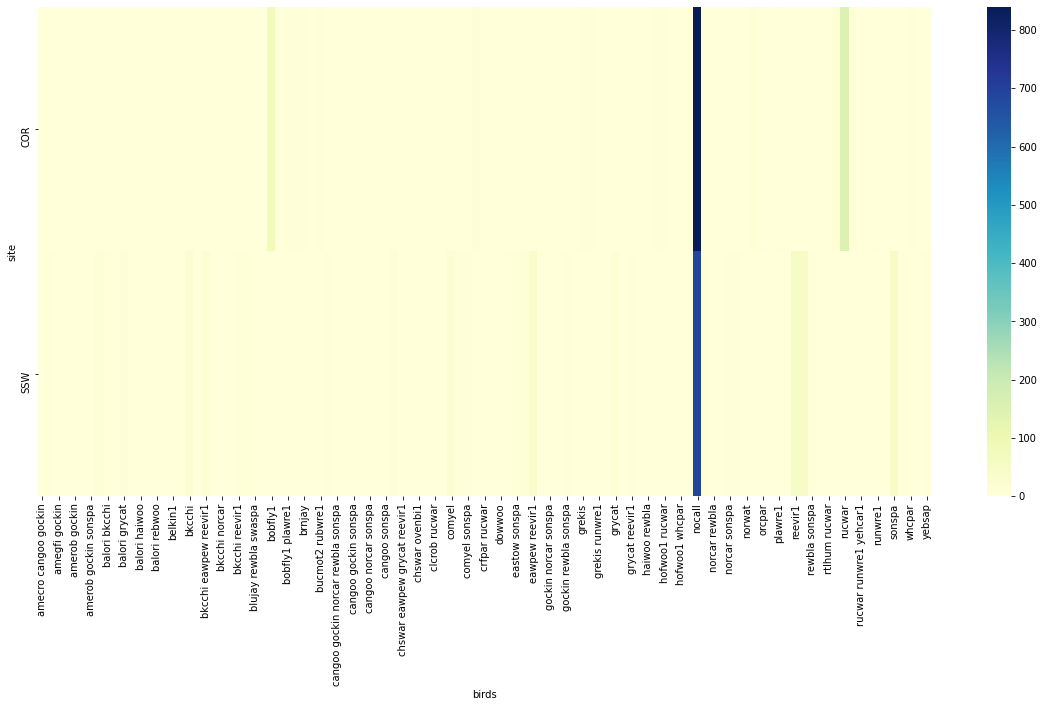

In [85]:
_, ax = plt.subplots(figsize=(20, 9))
sb.heatmap(contingency, fmt=".2f", cmap="YlGnBu", ax=ax)

In [86]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contingency)
c, p, dof, expected

(885.5199476782211,
 2.415491455108339e-122,
 108,
 array([[5.000e-01, 2.500e+00, 5.000e-01, 1.500e+00, 1.000e+00, 5.000e-01,
         5.000e-01, 6.000e+00, 3.500e+00, 5.000e-01, 6.500e+00, 1.000e+00,
         5.000e-01, 5.000e-01, 5.000e-01, 1.000e+00, 1.000e+00, 5.000e-01,
         1.200e+01, 1.500e+00, 1.000e+01, 1.000e+00, 1.000e+00, 5.000e-01,
         4.000e+00, 4.500e+00, 5.000e-01, 1.000e+00, 3.850e+01, 5.000e-01,
         4.000e+00, 2.000e+00, 3.000e+00, 5.000e-01, 2.000e+00, 3.000e+00,
         5.000e-01, 5.000e-01, 5.000e-01, 1.000e+00, 5.000e-01, 1.000e+00,
         1.500e+00, 6.500e+00, 5.000e-01, 5.000e-01, 5.000e-01, 1.000e+00,
         1.000e+00, 1.000e+00, 1.000e+01, 2.000e+00, 2.500e+00, 6.500e+00,
         1.000e+00, 1.500e+00, 1.500e+00, 4.000e+00, 4.500e+00, 8.000e+00,
         1.850e+01, 1.500e+00, 5.000e-01, 5.000e-01, 2.000e+00, 5.000e-01,
         2.000e+00, 3.500e+00, 5.000e-01, 1.000e+00, 9.500e+00, 1.000e+00,
         4.500e+00, 1.500e+00, 5.000e-01, 3.500e+

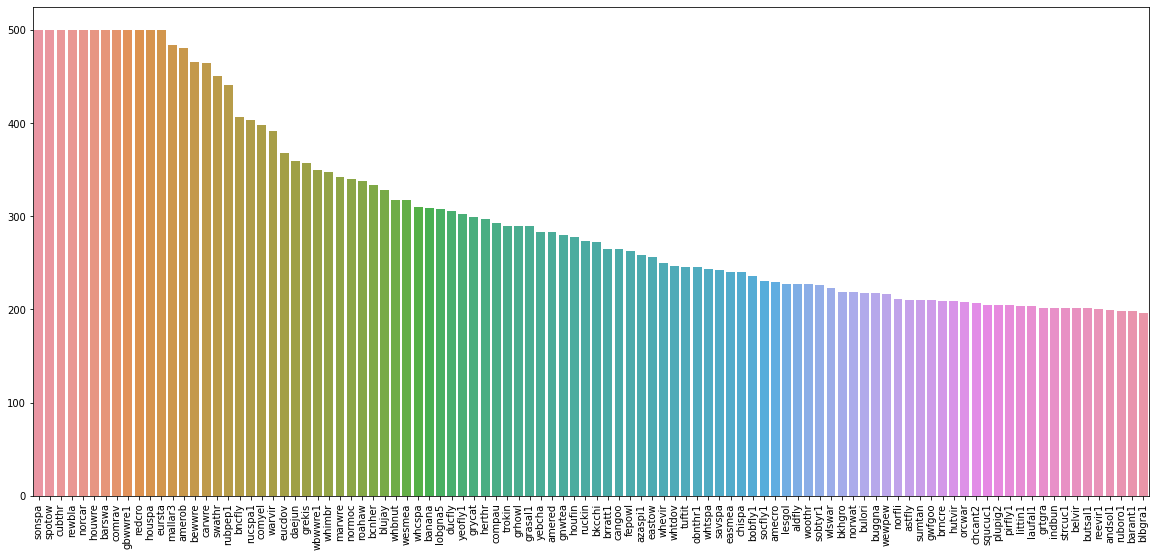

In [24]:
bird_counts = metadata_df["primary_label"].value_counts()[:100]
_, ax = plt.subplots(figsize=(20, 9))
sb.barplot(x=bird_counts.index, y=bird_counts.values, ax=ax)
_ = plt.xticks(rotation=90)

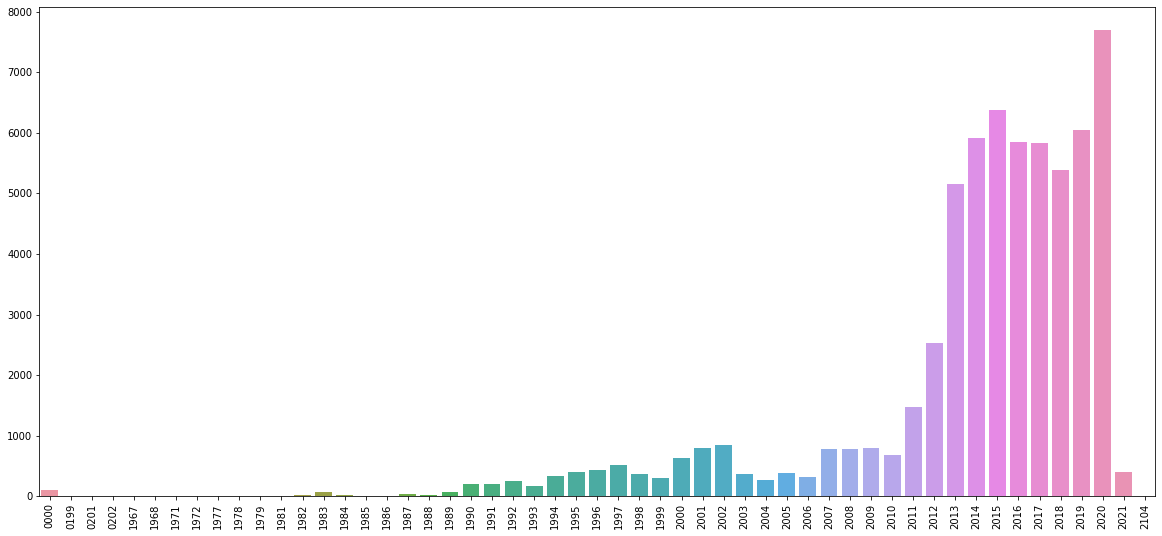

In [36]:
bird_counts = metadata_df["year"].value_counts().sort_index()
_, ax = plt.subplots(figsize=(20, 9))
sb.barplot(x=bird_counts.index, y=bird_counts.values, ax=ax)
_ = plt.xticks(rotation=90)

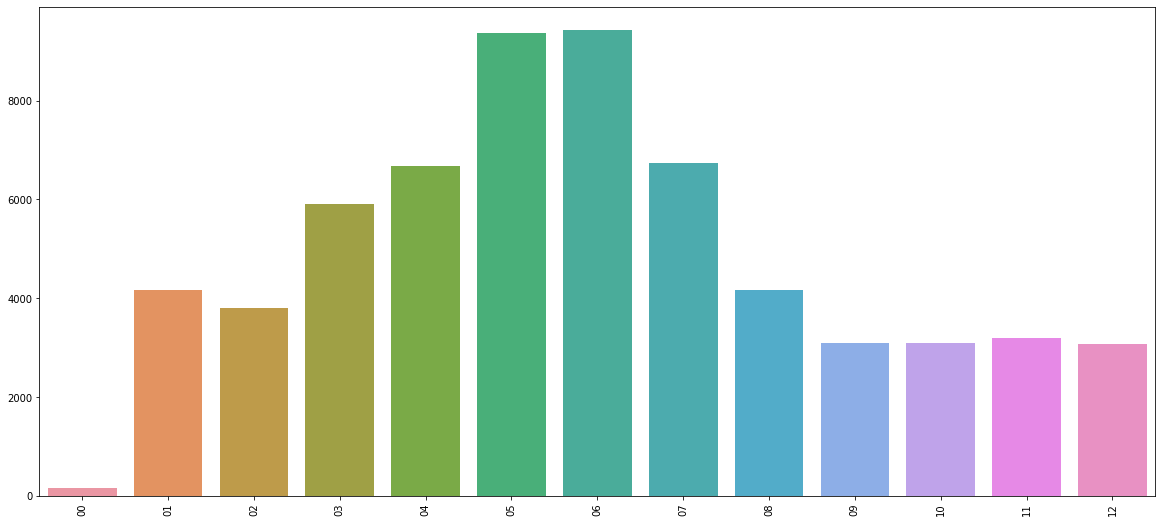

In [37]:
bird_counts = metadata_df["month"].value_counts().sort_index()
_, ax = plt.subplots(figsize=(20, 9))
sb.barplot(x=bird_counts.index, y=bird_counts.values, ax=ax)
_ = plt.xticks(rotation=90)

In [72]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(metadata_df.month, metadata_df.primary_label)
contingency

primary_label,acafly,acowoo,aldfly,ameavo,amecro,amegfi,amekes,amepip,amered,amerob,...,yefgra1,yegvir,yehbla,yehcar1,yelgro,yelwar,yeofly1,yerwar,yeteup1,yetvir
month,,,,,,,,,,,,,,,,,,,,,
00,1,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
01,12,18,0,0,21,1,6,2,9,15,...,14,1,0,18,0,9,30,10,4,3
02,8,17,1,1,16,4,8,6,4,17,...,5,2,1,5,0,6,31,7,5,0
03,6,26,1,0,15,11,3,4,5,49,...,7,12,5,18,11,15,34,6,8,4
04,7,14,6,11,26,29,4,0,13,82,...,11,7,11,13,4,7,21,32,5,16
05,33,16,60,25,22,45,8,21,106,105,...,5,10,23,5,12,15,19,44,3,44
06,32,13,65,3,44,16,18,13,99,151,...,5,19,34,7,0,13,31,55,3,20
07,8,16,29,1,23,25,7,8,21,27,...,4,26,5,8,39,16,34,9,5,12
08,4,24,54,1,5,26,1,2,8,8,...,8,6,1,7,0,17,18,1,11,0


In [73]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contingency)
c, p, dof, expected

(33711.93075221317,
 0.0,
 4752,
 array([[ 0.32541273,  0.46839711,  0.55961129, ...,  0.45607087,
          0.12819289,  0.26378153],
        [ 8.76934822, 12.62254668, 15.08062156, ..., 12.2903744 ,
          3.45459172,  7.10848681],
        [ 7.98205936, 11.48932786, 13.72672329, ..., 11.18697713,
          3.14444763,  6.47030569],
        ...,
        [ 6.4851608 ,  9.33470115, 11.15251137, ...,  9.08905112,
          2.55476031,  5.25691065],
        [ 6.69930337,  9.64293667, 11.5207717 , ...,  9.38917518,
          2.63911951,  5.43049591],
        [ 6.44737093,  9.28030665, 11.08752425, ...,  9.03608805,
          2.5398734 ,  5.22627795]]))

<AxesSubplot:xlabel='primary_label', ylabel='month'>

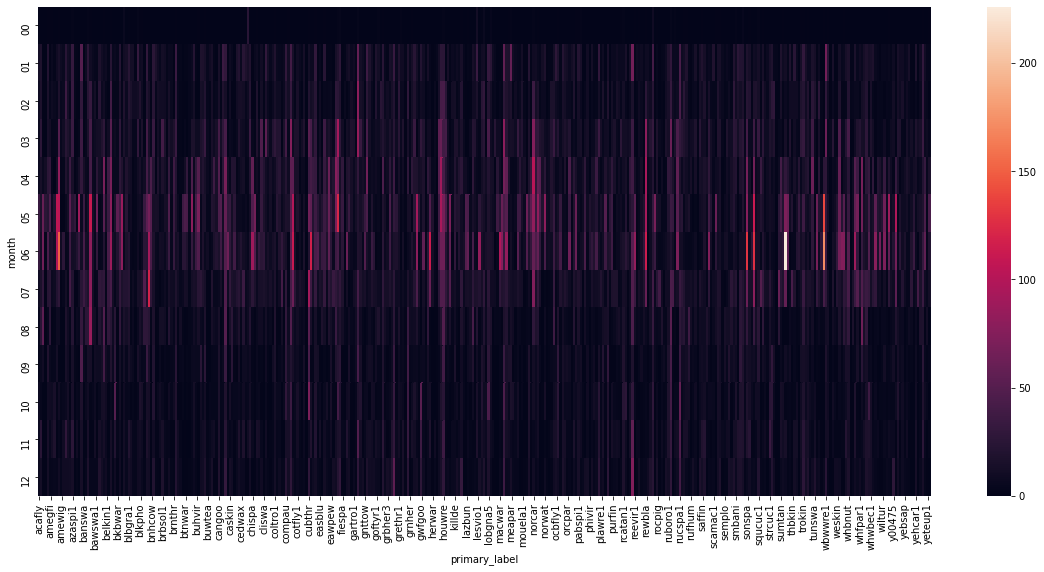

In [80]:
_, ax = plt.subplots(figsize=(20, 9))
sb.heatmap(contingency, fmt=".2f", ax=ax)

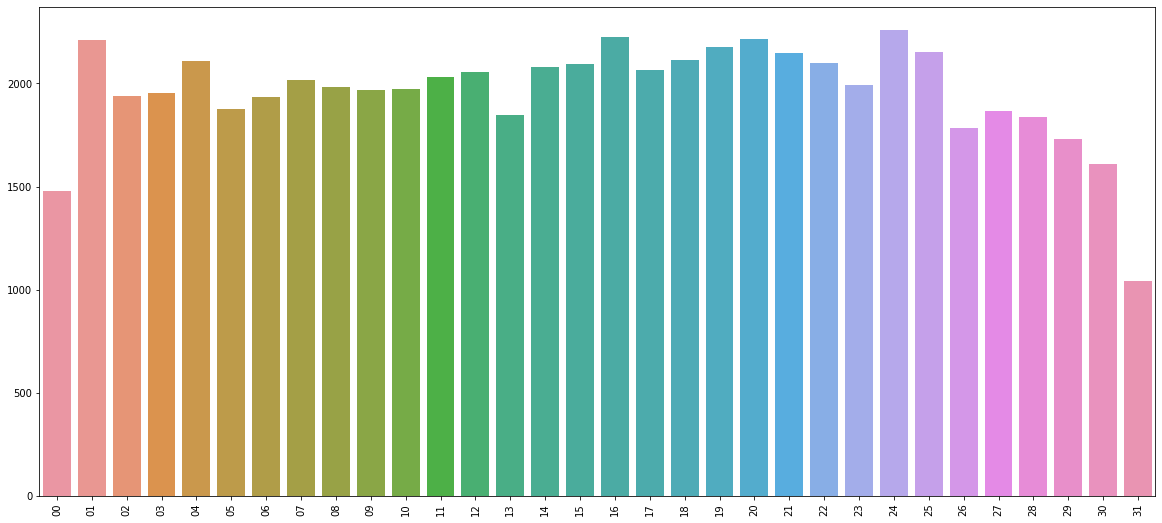

In [38]:
bird_counts = metadata_df["day"].value_counts().sort_index()
_, ax = plt.subplots(figsize=(20, 9))
sb.barplot(x=bird_counts.index, y=bird_counts.values, ax=ax)
_ = plt.xticks(rotation=90)

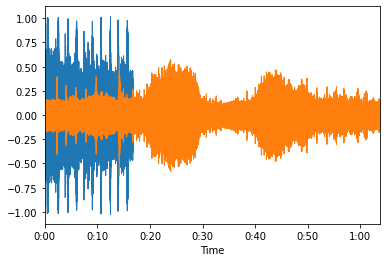

In [25]:
signal_1 = load_short_audio(
    "acafly", "XC109605.ogg", DATA_PATH + "/train_short_audio", SAMPLE_RATE
)
signal_2 = load_short_audio(
    "acafly", "XC11209.ogg", DATA_PATH + "/train_short_audio", SAMPLE_RATE
)

librosa.display.waveplot(signal_2, sr=SAMPLE_RATE)
librosa.display.waveplot(signal_1, sr=SAMPLE_RATE)

---

## Preprocessing Data

In [60]:
def get_audio_duration(row):
    """
    Get audio duration.
    """
    y = load_short_audio(
        row["primary_label"],
        row["filename"],
        DATA_PATH + "/train_short_audio",
        SAMPLE_RATE,
    )
    if y is not None:
        return librosa.get_duration(y=y, sr=SAMPLE_RATE)
    return 0


metadata_df["audio_duration"] = metadata_df[
    ["primary_label", "filename"]
].swifter.apply(get_audio_duration, axis=1)
metadata_df

Pandas Apply:   0%|          | 0/62874 [00:00<?, ?it/s]

,primary_label,latitude,longitude,date,time,rating,filename,common_name,scientific_name,year,month,day,audio_duration
0,acafly,35.3860,-84.1250,2012-08-12,09:30,2.5,XC109605.ogg,Acadian Flycatcher,Empidonax virescens,2012,08,12,63.674563
1,acafly,9.1334,-79.6501,2000-12-26,?,3.0,XC11209.ogg,Acadian Flycatcher,Empidonax virescens,2000,12,26,16.654156
2,acafly,5.7813,-75.7452,2012-01-10,15:20,3.0,XC127032.ogg,Acadian Flycatcher,Empidonax virescens,2012,01,10,47.139063
3,acafly,4.6717,-75.6283,2009-06-19,07:50,3.5,XC129974.ogg,Acadian Flycatcher,Empidonax virescens,2009,06,19,14.068031
4,acafly,4.6717,-75.6283,2009-06-19,07:50,3.5,XC129981.ogg,Acadian Flycatcher,Empidonax virescens,2009,06,19,40.660688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62869,yetvir,30.2150,-97.6505,2020-07-10,08:30,1.0,XC591680.ogg,Yellow-throated Vireo,Vireo flavifrons,2020,07,10,44.509000
62870,yetvir,42.3005,-72.5877,2019-05-31,09:30,5.0,XC600085.ogg,Yellow-throated Vireo,Vireo flavifrons,2019,05,31,78.445000
62871,yetvir,42.3005,-72.5877,2020-06-02,08:30,4.5,XC602701.ogg,Yellow-throated Vireo,Vireo flavifrons,2020,06,02,101.869000
62872,yetvir,32.2357,-99.8811,2019-04-27,17:30,4.0,XC614733.ogg,Yellow-throated Vireo,Vireo flavifrons,2019,04,27,16.419062


In [63]:
metadata_df.to_csv(DATA_PATH + "/outputs/train_metadata.csv")

---

<AxesSubplot:xlabel='audio_duration', ylabel='Count'>

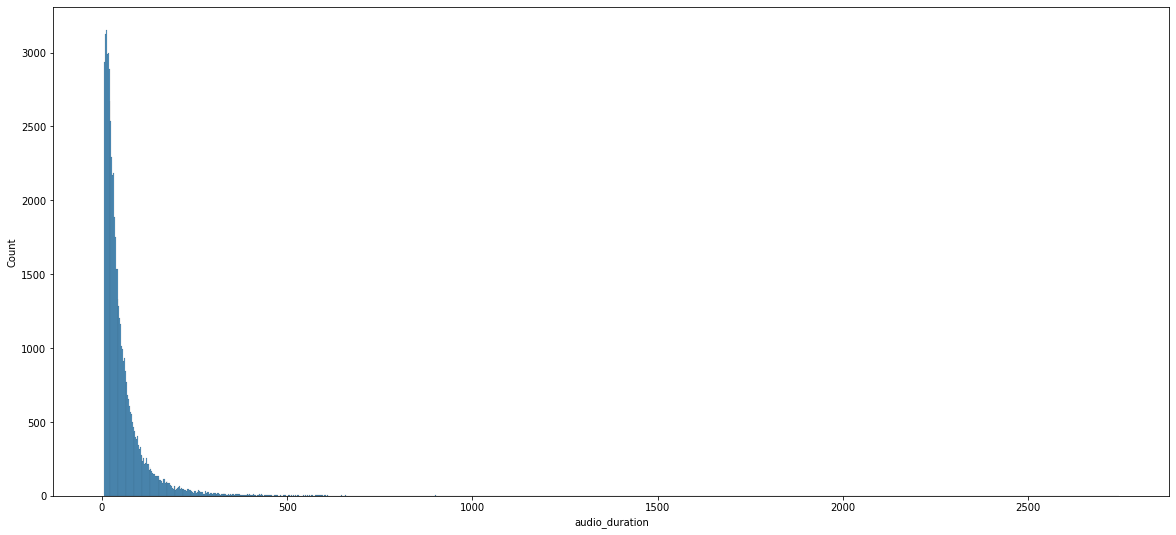

In [61]:
_, ax = plt.subplots(figsize=(20, 9))
sb.histplot(data=metadata_df["audio_duration"], ax=ax)

In [65]:
metadata_df["audio_duration"].describe()

count    62874.000000
mean        56.255305
std         74.042363
min          5.958125
25%         18.378250
50%         34.260688
75%         66.205000
max       2745.352937
Name: audio_duration, dtype: float64

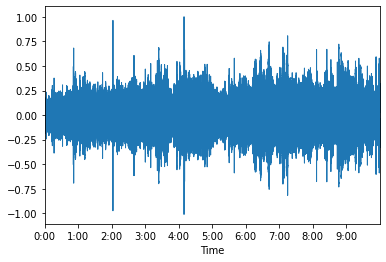

In [26]:
for x in load_soundscape_audio(
    "7019_COR", DATA_PATH + "/train_soundscapes", SAMPLE_RATE
):
    librosa.display.waveplot(x[1], sr=SAMPLE_RATE)

(128, 3980)


/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


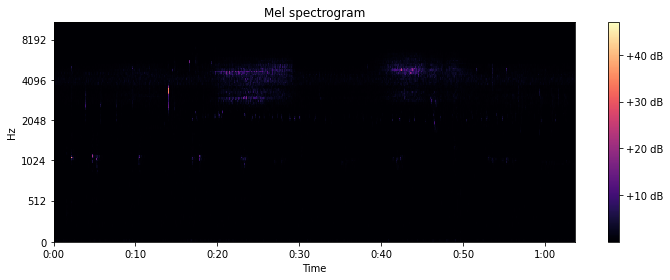

In [27]:
from birdclef.postprocessing import get_mel_spec

plt.figure(figsize=(10, 4))
mel_spec = get_mel_spec(signal_1)
print(mel_spec.shape)
librosa.display.specshow(
    mel_spec, sr=SAMPLE_RATE, y_axis="mel", fmax=None, x_axis="time"
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel spectrogram")
plt.tight_layout()

(128, 1041)


/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


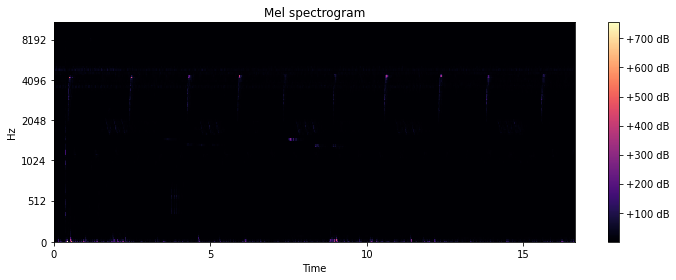

In [30]:
plt.figure(figsize=(10, 4))
mel_spec = get_mel_spec(signal_2)
print(mel_spec.shape)
librosa.display.specshow(
    mel_spec, sr=SAMPLE_RATE, y_axis="mel", fmax=None, x_axis="time"
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel spectrogram")
plt.tight_layout()